In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [6]:
df= pd.read_csv("Admission_Predict_Ver1.1.csv")
df.shape

(500, 9)

## **EDA**

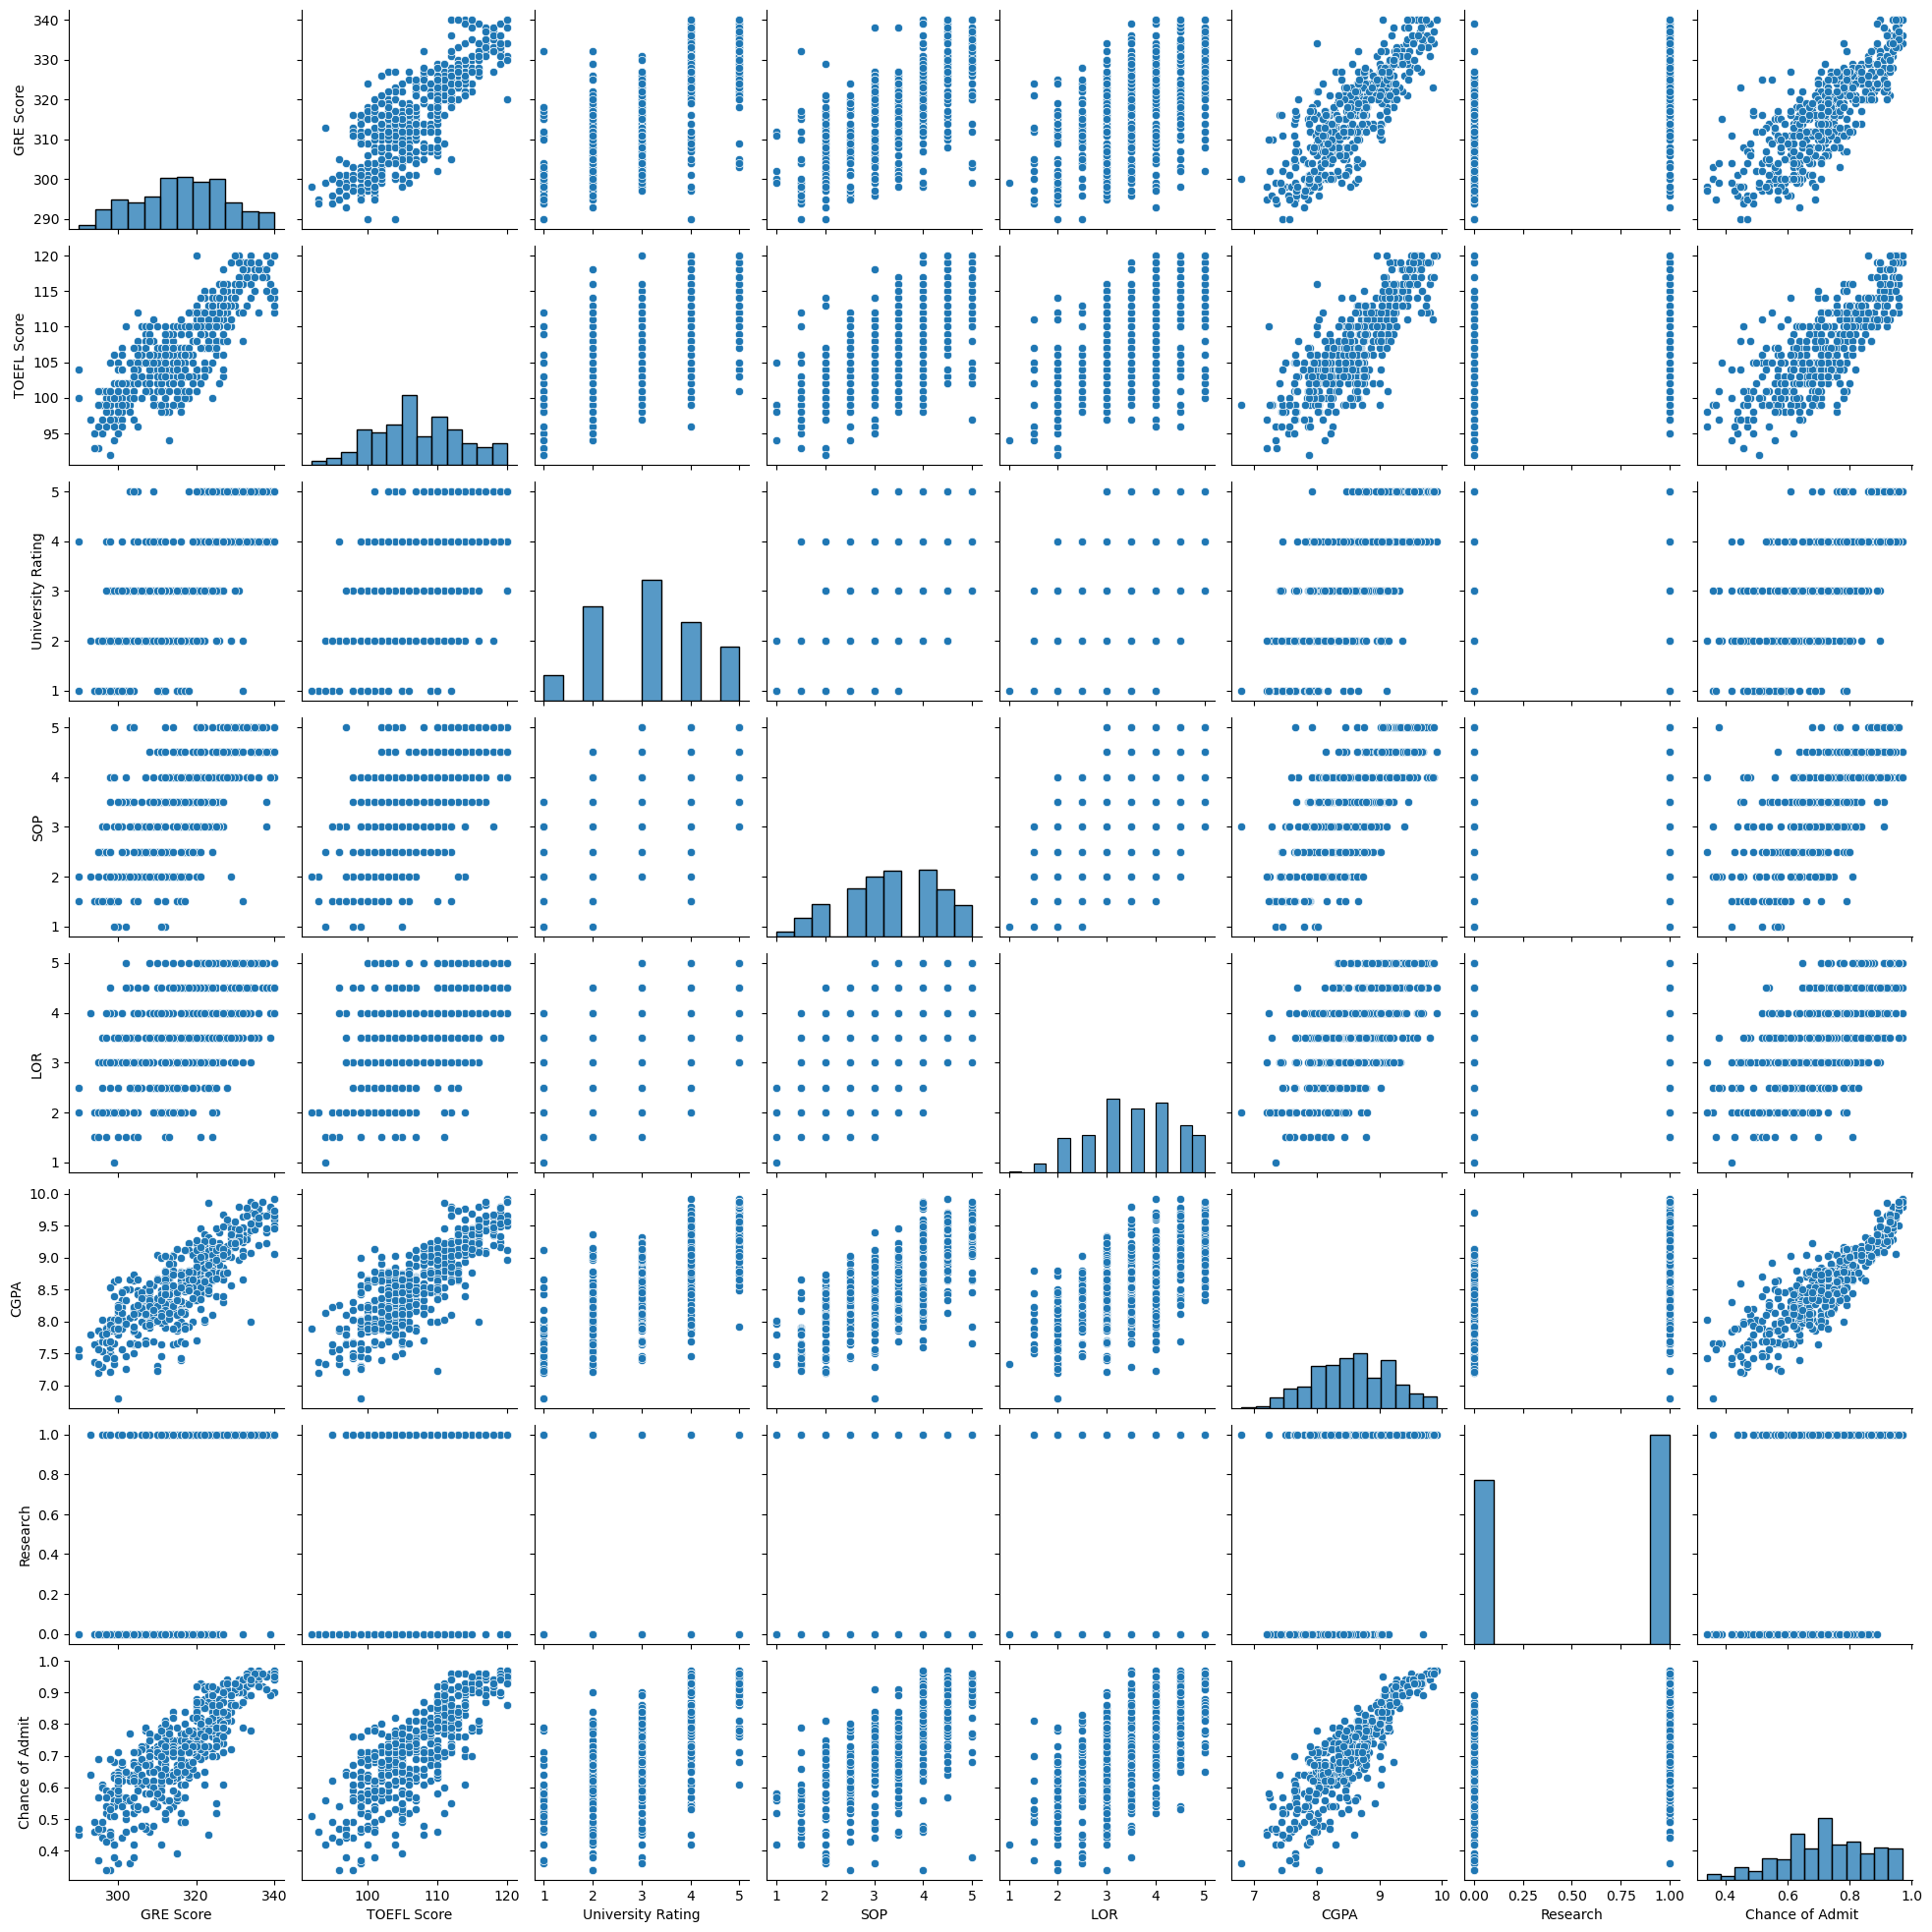

In [8]:
df = df.drop('Serial No.', axis=1)
sns.pairplot(df)

In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
cat_cols=['University Rating', 'SOP','LOR ','Research']

In [11]:
num_cols=['GRE Score', 'TOEFL Score','CGPA']

In [12]:
df[cat_cols]=df[cat_cols].astype('category')

In [13]:
df.dtypes

GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                  category
LOR                  category
CGPA                  float64
Research             category
Chance of Admit       float64
dtype: object

## **Visualizations**

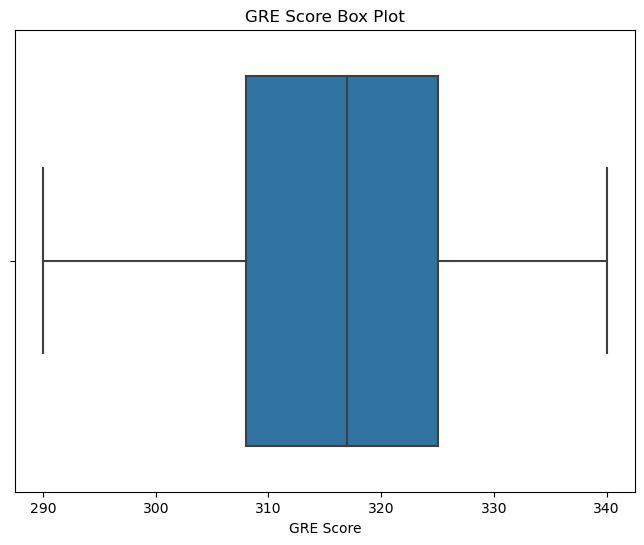

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['GRE Score'])
plt.title("GRE Score Box Plot")
plt.xlabel("GRE Score")
plt.show()

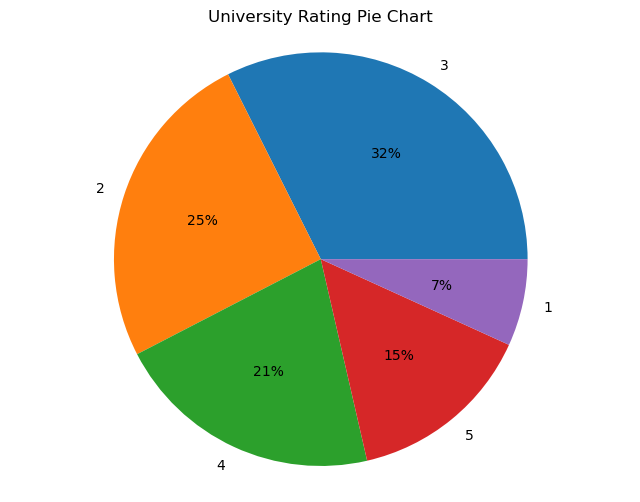

In [15]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Get the value counts of University Rating
rating_counts = df['University Rating'].value_counts()

# Plot a pie chart with percentage labels
ax.pie(rating_counts, labels=rating_counts.index, autopct='%1.0f%%')

# Set the title
ax.set_title("University Rating Pie Chart")

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the plot
plt.show()

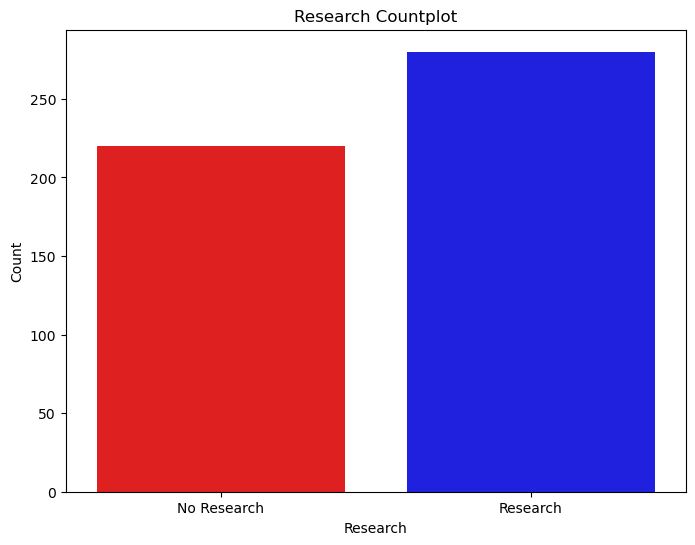

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Research', data=df, palette=["red", "blue"])
plt.title("Research Countplot")
plt.xlabel("Research")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Research", "Research"])
plt.show()

## **Admission chance VS University Rankings**

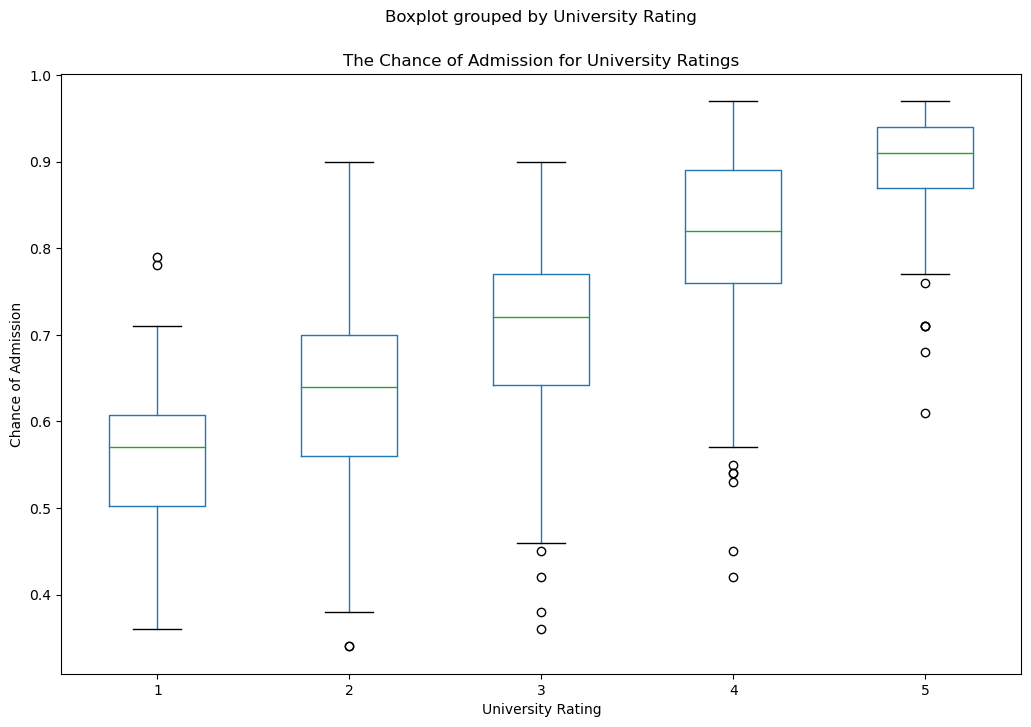

In [17]:
df.boxplot(column='Chance of Admit ',by='University Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

In [19]:
# Split the data into features and target variable
X = df.drop('Chance of Admit ',axis=1)
y =df['Chance of Admit ']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Standization**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=X_train[num_cols].columns)
X_test_std = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=X_test[num_cols].columns)

## **Dumminfication**

In [22]:
X_train_dum = pd.get_dummies((X_train[cat_cols]),drop_first=True)
X_test_dum = pd.get_dummies((X_test[cat_cols]),drop_first=True)

## **Resetting index to avoid null values during merge**

In [23]:
X_train_std = X_train_std.reset_index()
X_train_std

index  GRE Score  TOEFL Score      CGPA
0        0   0.389986     0.602418  0.415018
1        1  -0.066405     0.602418 -0.067852
2        2  -1.253022    -0.876917 -0.134454
3        3  -0.248961    -0.055064 -0.517420
4        4  -0.796631    -0.219435 -0.617324
..     ...        ...          ...       ...
395    395   1.120212     0.602418  0.997792
396    396  -0.979187    -0.383805 -0.600673
397    397  -1.344300    -1.370029 -2.215790
398    398  -0.705353    -0.383805 -1.499810
399    399  -0.248961    -0.219435 -0.550721

[400 rows x 4 columns]

In [24]:
X_train_std = X_train_std.drop(["index"], axis=1)
X_train_std

GRE Score  TOEFL Score      CGPA
0     0.389986     0.602418  0.415018
1    -0.066405     0.602418 -0.067852
2    -1.253022    -0.876917 -0.134454
3    -0.248961    -0.055064 -0.517420
4    -0.796631    -0.219435 -0.617324
..         ...          ...       ...
395   1.120212     0.602418  0.997792
396  -0.979187    -0.383805 -0.600673
397  -1.344300    -1.370029 -2.215790
398  -0.705353    -0.383805 -1.499810
399  -0.248961    -0.219435 -0.550721

[400 rows x 3 columns]

In [25]:
X_test_std = X_test_std.reset_index()
X_test_std

index  GRE Score  TOEFL Score      CGPA
0       0   1.576604     1.424271  1.597217
1       1  -0.248961     0.109306  0.764683
2       2  -0.157683    -0.383805 -1.549762
3       3  -0.431518     0.273677  0.181909
4       4   0.846378     0.766789  0.781333
..    ...        ...          ...       ...
95     95  -1.618135    -2.191882 -2.065934
96     96  -0.157683    -0.219435 -0.267660
97     97   1.120212     1.095530 -0.034550
98     98   0.116152     0.438048 -0.067852
99     99  -0.248961    -0.383805 -0.467468

[100 rows x 4 columns]

In [26]:
X_test_std = X_test_std.drop(["index"], axis=1)
X_test_std

GRE Score  TOEFL Score      CGPA
0    1.576604     1.424271  1.597217
1   -0.248961     0.109306  0.764683
2   -0.157683    -0.383805 -1.549762
3   -0.431518     0.273677  0.181909
4    0.846378     0.766789  0.781333
..        ...          ...       ...
95  -1.618135    -2.191882 -2.065934
96  -0.157683    -0.219435 -0.267660
97   1.120212     1.095530 -0.034550
98   0.116152     0.438048 -0.067852
99  -0.248961    -0.383805 -0.467468

[100 rows x 3 columns]

In [27]:
X_train_dum = X_train_dum.reset_index()
X_train_dum

index  University Rating_2  University Rating_3  University Rating_4  \
0      249                    0                    1                    0   
1      433                    0                    0                    1   
2       19                    0                    1                    0   
3      322                    1                    0                    0   
4      332                    0                    1                    0   
..     ...                  ...                  ...                  ...   
395    106                    0                    0                    1   
396    270                    1                    0                    0   
397    348                    0                    0                    0   
398    435                    1                    0                    0   
399    102                    1                    0                    0   

     University Rating_5  SOP_1.5  SOP_2.0  SOP_2.5  SOP_3.0  SOP_3.5  ...  \
0                      0        0        0        0        0        1  ...   
1                      0        0        0        0        0        0  ...   
2                      0        0        0        0        0        1  ...   
3                      0        0        0        1        0        0  ...   
4                      0        0        0        0        0        1  ...   
..                   ...      ...      ...      ...      ...      ...  ...   
395                    0        0        0        0        0        0  ...   
396                    0        0        0        1        0        0  ...   
397                    0        0        1        0        0        0  ...   
398                    0        0        0        1        0        0  ...   
399                    0        0        0        0        0        0  ...   

     SOP_5.0  LOR _1.5  LOR _2.0  LOR _2.5  LOR _3.0  LOR _3.5  LOR _4.0  \
0          0         0         0         0         0         0         1   
1          0         0         0         0         0         0         0   
2          0         0         0         0         1         0         0   
3          0         0         0         0         0         0         1   
4          0         0         0         1         0         0         0   
..       ...       ...       ...       ...       ...       ...       ...   
395        0         0         0         0         0         0         0   
396        0         0         0         0         1         0         0   
397        0         0         1         0         0         0         0   
398        0         0         0         0         0         0         1   
399        0         0         0         0         0         1         0   

     LOR _4.5  LOR _5.0  Research_1  
0           0         0           1  
1           0         1           0  
2           0         0           0  
3           0         0           0  
4           0         0           1  
..        ...       ...         ...  
395         1         0           1  
396         0         0           1  
397         0         0           0  
398         0         0           0  
399         0         0           0  

[400 rows x 22 columns]

In [28]:
X_train_dum = X_train_dum.drop(["index"], axis=1)
X_train_dum

University Rating_2  University Rating_3  University Rating_4  \
0                      0                    1                    0   
1                      0                    0                    1   
2                      0                    1                    0   
3                      1                    0                    0   
4                      0                    1                    0   
..                   ...                  ...                  ...   
395                    0                    0                    1   
396                    1                    0                    0   
397                    0                    0                    0   
398                    1                    0                    0   
399                    1                    0                    0   

     University Rating_5  SOP_1.5  SOP_2.0  SOP_2.5  SOP_3.0  SOP_3.5  \
0                      0        0        0        0        0        1   
1                      0        0        0        0        0        0   
2                      0        0        0        0        0        1   
3                      0        0        0        1        0        0   
4                      0        0        0        0        0        1   
..                   ...      ...      ...      ...      ...      ...   
395                    0        0        0        0        0        0   
396                    0        0        0        1        0        0   
397                    0        0        1        0        0        0   
398                    0        0        0        1        0        0   
399                    0        0        0        0        0        0   

     SOP_4.0  ...  SOP_5.0  LOR _1.5  LOR _2.0  LOR _2.5  LOR _3.0  LOR _3.5  \
0          0  ...        0         0         0         0         0         0   
1          1  ...        0         0         0         0         0         0   
2          0  ...        0         0         0         0         1         0   
3          0  ...        0         0         0         0         0         0   
4          0  ...        0         0         0         1         0         0   
..       ...  ...      ...       ...       ...       ...       ...       ...   
395        0  ...        0         0         0         0         0         0   
396        0  ...        0         0         0         0         1         0   
397        0  ...        0         0         1         0         0         0   
398        0  ...        0         0         0         0         0         0   
399        1  ...        0         0         0         0         0         1   

     LOR _4.0  LOR _4.5  LOR _5.0  Research_1  
0           1         0         0           1  
1           0         0         1           0  
2           0         0         0           0  
3           1         0         0           0  
4           0         0         0           1  
..        ...       ...       ...         ...  
395         0         1         0           1  
396         0         0         0           1  
397         0         0         0           0  
398         1         0         0           0  
399         0         0         0           0  

[400 rows x 21 columns]

In [29]:
X_test_dum = X_test_dum.reset_index()
X_test_dum

index  University Rating_2  University Rating_3  University Rating_4  \
0     361                    0                    0                    1   
1      73                    0                    0                    1   
2     374                    1                    0                    0   
3     155                    0                    1                    0   
4     104                    0                    1                    0   
..    ...                  ...                  ...                  ...   
95    347                    0                    0                    0   
96     86                    0                    1                    0   
97     75                    1                    0                    0   
98    438                    0                    0                    0   
99     15                    0                    1                    0   

    University Rating_5  SOP_1.5  SOP_2.0  SOP_2.5  SOP_3.0  SOP_3.5  ...  \
0                     0        0        0        0        0        0  ...   
1                     0        0        0        0        0        0  ...   
2                     0        0        1        0        0        0  ...   
3                     0        0        0        0        1        0  ...   
4                     0        0        0        0        0        1  ...   
..                  ...      ...      ...      ...      ...      ...  ...   
95                    0        0        0        0        0        0  ...   
96                    0        0        0        0        0        0  ...   
97                    0        0        1        0        0        0  ...   
98                    0        0        0        1        0        0  ...   
99                    0        0        0        0        0        1  ...   

    SOP_5.0  LOR _1.5  LOR _2.0  LOR _2.5  LOR _3.0  LOR _3.5  LOR _4.0  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         1   
2         0         0         0         1         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   
..      ...       ...       ...       ...       ...       ...       ...   
95        0         0         0         0         0         0         0   
96        0         0         0         0         0         1         0   
97        0         0         0         0         0         0         1   
98        0         0         0         0         0         1         0   
99        0         0         0         1         0         0         0   

    LOR _4.5  LOR _5.0  Research_1  
0          0         0           1  
1          0         0           1  
2          0         0           0  
3          0         0           0  
4          0         0           1  
..       ...       ...         ...  
95         0         0           0  
96         0         0           0  
97         0         0           1  
98         0         0           1  
99         0         0           0  

[100 rows x 22 columns]

In [30]:
X_test_dum = X_test_dum.drop(["index"], axis=1)
X_test_dum

University Rating_2  University Rating_3  University Rating_4  \
0                     0                    0                    1   
1                     0                    0                    1   
2                     1                    0                    0   
3                     0                    1                    0   
4                     0                    1                    0   
..                  ...                  ...                  ...   
95                    0                    0                    0   
96                    0                    1                    0   
97                    1                    0                    0   
98                    0                    0                    0   
99                    0                    1                    0   

    University Rating_5  SOP_1.5  SOP_2.0  SOP_2.5  SOP_3.0  SOP_3.5  SOP_4.0  \
0                     0        0        0        0        0        0        1   
1                     0        0        0        0        0        0        0   
2                     0        0        1        0        0        0        0   
3                     0        0        0        0        1        0        0   
4                     0        0        0        0        0        1        0   
..                  ...      ...      ...      ...      ...      ...      ...   
95                    0        0        0        0        0        0        0   
96                    0        0        0        0        0        0        0   
97                    0        0        1        0        0        0        0   
98                    0        0        0        1        0        0        0   
99                    0        0        0        0        0        1        0   

    ...  SOP_5.0  LOR _1.5  LOR _2.0  LOR _2.5  LOR _3.0  LOR _3.5  LOR _4.0  \
0   ...        0         0         0         0         0         1         0   
1   ...        0         0         0         0         0         0         1   
2   ...        0         0         0         1         0         0         0   
3   ...        0         0         0         0         1         0         0   
4   ...        0         0         0         0         1         0         0   
..  ...      ...       ...       ...       ...       ...       ...       ...   
95  ...        0         0         0         0         0         0         0   
96  ...        0         0         0         0         0         1         0   
97  ...        0         0         0         0         0         0         1   
98  ...        0         0         0         0         0         1         0   
99  ...        0         0         0         1         0         0         0   

    LOR _4.5  LOR _5.0  Research_1  
0          0         0           1  
1          0         0           1  
2          0         0           0  
3          0         0           0  
4          0         0           1  
..       ...       ...         ...  
95         0         0           0  
96         0         0           0  
97         0         0           1  
98         0         0           1  
99         0         0           0  

[100 rows x 21 columns]

## **Creating final df**

In [31]:
#concatnte the to df
final_X_train = pd.concat([X_train_std, X_train_dum], axis=1)
final_X_test = pd.concat([X_test_std, X_test_dum], axis=1)

In [32]:
final_X_train.isnull().sum()

GRE Score              0
TOEFL Score            0
CGPA                   0
University Rating_2    0
University Rating_3    0
University Rating_4    0
University Rating_5    0
SOP_1.5                0
SOP_2.0                0
SOP_2.5                0
SOP_3.0                0
SOP_3.5                0
SOP_4.0                0
SOP_4.5                0
SOP_5.0                0
LOR _1.5               0
LOR _2.0               0
LOR _2.5               0
LOR _3.0               0
LOR _3.5               0
LOR _4.0               0
LOR _4.5               0
LOR _5.0               0
Research_1             0
dtype: int64

In [34]:
final_X_test .isnull().sum()

GRE Score              0
TOEFL Score            0
CGPA                   0
University Rating_2    0
University Rating_3    0
University Rating_4    0
University Rating_5    0
SOP_1.5                0
SOP_2.0                0
SOP_2.5                0
SOP_3.0                0
SOP_3.5                0
SOP_4.0                0
SOP_4.5                0
SOP_5.0                0
LOR _1.5               0
LOR _2.0               0
LOR _2.5               0
LOR _3.0               0
LOR _3.5               0
LOR _4.0               0
LOR _4.5               0
LOR _5.0               0
Research_1             0
dtype: int64

## **Model Building**

In [46]:
result={}

models = {'DecisionTree': DecisionTreeRegressor(),
          'Linear Regression': LinearRegression(),
          'RandomForest': RandomForestRegressor(),
          'KNeighbours': KNeighborsRegressor(n_neighbors = 2),
           'SVM': SVR(),
           'AdaBoostClassifier': AdaBoostRegressor(),
           'GradientBoostingClassifier': GradientBoostingRegressor(),
           'Xgboost': XGBRegressor(),
           'Lasso':  Lasso(),
           'Ridge':  Ridge(),
           'BayesianRidge':  BayesianRidge(),
           'ElasticNet': ElasticNet(),
           }


for key,value in models.items():
    temp=[]
    model =value
    model.fit(final_X_train, y_train)
    predictions = model.predict(final_X_test)
    rmse=np.sqrt(mean_squared_error(y_test, predictions))
    temp.append(rmse)
    result[key]=temp
    
    
print(result) 
    

{'DecisionTree': [0.08417244204607587], 'Linear Regression': [0.061289854176161875], 'RandomForest': [0.0663648724853744], 'KNeighbours': [0.07784279028914624], 'SVM': [0.0757832805805699], 'AdaBoostClassifier': [0.070179398502494], 'GradientBoostingClassifier': [0.06557991861648606], 'Xgboost': [0.072242434458239], 'Lasso': [0.1435208369018241], 'Ridge': [0.061195592486011835], 'BayesianRidge': [0.06119281319828998], 'ElasticNet': [0.1435208369018241]}


In [47]:
result=pd.DataFrame(result)
result=result.T
result

0
DecisionTree                0.084172
Linear Regression           0.061290
RandomForest                0.066365
KNeighbours                 0.077843
SVM                         0.075783
AdaBoostClassifier          0.070179
GradientBoostingClassifier  0.065580
Xgboost                     0.072242
Lasso                       0.143521
Ridge                       0.061196
BayesianRidge               0.061193
ElasticNet                  0.143521

In [48]:
col=result.columns.to_list()
col[0]="Root Mean Squared Error"
result.columns=col
result

Root Mean Squared Error
DecisionTree                               0.084172
Linear Regression                          0.061290
RandomForest                               0.066365
KNeighbours                                0.077843
SVM                                        0.075783
AdaBoostClassifier                         0.070179
GradientBoostingClassifier                 0.065580
Xgboost                                    0.072242
Lasso                                      0.143521
Ridge                                      0.061196
BayesianRidge                              0.061193
ElasticNet                                 0.143521

## **Conclusion**

At the end we find that the linear Regression perform very well among all the regression models.
